In [1]:
import zipfile
from os import walk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import geopandas as gpd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)

In [2]:
final = pd.read_csv("final_merged_dataframe.csv", dtype=object)
final["Year"] = final["Year"].astype(int, copy=True)
final["Keyword Count"] = final["Keyword Count"].astype(int, copy=True)

In [3]:
final["Country Name"].unique()

array(['Algeria', 'Australia', 'Austria', 'Bahrain', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Chile',
       'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Ecuador',
       'Egypt, Arab Rep.', 'Eswatini', 'Ethiopia', 'Finland', 'France',
       'Gambia, The', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland',
       'Italy', 'Jordan', 'Kiribati', 'Korea, Rep.', 'Kuwait', 'Lesotho',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta',
       'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Morocco',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Oman', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Portugal',
       'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia',
       'Senegal', 'Seyche

In [4]:
final.columns

Index(['ISO-alpha3 Code', 'Year', 'Parity_Indicator_Code', 'Parity_Value',
       'Keyword Count', 'Sentiment Score', 'Relevant Text',
       'Years with Highest Keyword Count',
       'Years with Most Positive Sentiment', 'Country Name',
       'Literacy_Indicator_Code', 'Children Out of School (%)',
       'Expected Years of Schooling', 'Expected Years of Schooling (Female)',
       'Expected Years of Schooling (Male)',
       'Government Expenditure on Education (% of GDP)',
       'Lower Secondary Completion Rate (Female)',
       'Lower Secondary Completion Rate (Male)',
       'Lower Secondary Completion Rate (Total)',
       'Primary Completion Rate (Female)', 'Primary Completion Rate (Male)',
       'Primary Completion Rate (Total)',
       'School Enrollment (Preprimary) Gross',
       'School Enrollment (Preprimary, Female) Gross',
       'School Enrollment (Preprimary, Male) Gross',
       'School Enrollment (Primary) Gross',
       'School Enrollment (Primary, Female) Gross

In [5]:
final.shape

(2954795, 34)

In [6]:
final.head()

,ISO-alpha3 Code,Year,Parity_Indicator_Code,Parity_Value,Keyword Count,Sentiment Score,Relevant Text,Years with Highest Keyword Count,Years with Most Positive Sentiment,Country Name,Literacy_Indicator_Code,Children Out of School (%),Expected Years of Schooling,Expected Years of Schooling (Female),Expected Years of Schooling (Male),Government Expenditure on Education (% of GDP),Lower Secondary Completion Rate (Female),Lower Secondary Completion Rate (Male),Lower Secondary Completion Rate (Total),Primary Completion Rate (Female),Primary Completion Rate (Male),Primary Completion Rate (Total),School Enrollment (Preprimary) Gross,"School Enrollment (Preprimary, Female) Gross","School Enrollment (Preprimary, Male) Gross",School Enrollment (Primary) Gross,"School Enrollment (Primary, Female) Gross","School Enrollment (Primary, Male) Gross",School Enrollment (Secondary) Gross,"School Enrollment (Secondary, Female) Gross","School Enrollment (Secondary, Male) Gross",School Enrollment (Tertiary) Gross,"School Enrollment (Tertiary, Female) Gross","School Enrollment (Tertiary, Male) Gross"
0,DZA,2020,Primary,0.969,1,0.0,Algerian women took part in the national revol...,[2023],[2018],Algeria,SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.4075603485107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DZA,2020,Primary,0.969,1,0.0,Algerian women took part in the national revol...,[2023],[2018],Algeria,SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.7272396087646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DZA,2020,Primary,0.969,1,0.0,Algerian women took part in the national revol...,[2023],[2018],Algeria,SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.8195495605469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DZA,2020,Primary,0.969,1,0.0,Algerian women took part in the national revol...,[2023],[2018],Algeria,SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.5108795166016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DZA,2020,Primary,0.969,1,0.0,Algerian women took part in the national revol...,[2023],[2018],Algeria,SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.3181495666504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
x = final
df = x.drop_duplicates(x[["Year","Parity_Indicator_Code","Parity_Value","Relevant Text","Country Name"]])
df = df[df["Parity_Indicator_Code"] == "Primary"]
keyword_df = df[["Country Name","Year", "Keyword Count"]]
keyword_df["Keyword Count"].fillna(value=0)

0          1
724        1
1448       2
2172       6
2896       1
          ..
2952299    0
2952715    0
2953131    0
2953547    0
2953963    1
Name: Keyword Count, Length: 3837, dtype: int32

In [8]:
keyword_df.shape

(3837, 3)

In [9]:
keyword_df["Country Name"].unique()

array(['Algeria', 'Australia', 'Austria', 'Bahrain', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Chile',
       'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Ecuador',
       'Egypt, Arab Rep.', 'Eswatini', 'Ethiopia', 'Finland', 'France',
       'Gambia, The', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland',
       'Italy', 'Jordan', 'Kiribati', 'Korea, Rep.', 'Kuwait', 'Lesotho',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta',
       'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Morocco',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Oman', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Portugal',
       'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia',
       'Senegal', 'Seyche

In [10]:
keyword_df_2017 = keyword_df[keyword_df["Year"] == "2017"]
keyword_df_2017.head()

,Country Name,Year,Keyword Count


In [11]:
world = gpd.read_file('gpd_countries/ne_110m_admin_0_countries.shp')
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least develope

In [12]:
world_keyword_2017 = world.merge(keyword_df_2017, how="left", left_on=['SOVEREIGNT'], right_on=['Country Name'])
world_keyword_2017["Keyword Count"] = world_keyword_2017["Keyword Count"].fillna(value=0)
world_keyword_2017["Keyword Count"] = world_keyword_2017["Keyword Count"].astype(int)
world_keyword_2017.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Country Name,Year,Keyword Count
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",NaN,NaN,0
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",NaN,NaN,0
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin.; Claimed by Morocco,Western Sahara,None

In [75]:
keyword_df_1970 = keyword_df[(keyword_df["Year"].astype(int) > 1969) & (keyword_df["Year"].astype(int) < 1975)]
keyword_df_1995 = keyword_df[(keyword_df["Year"].astype(int) > 1994) & (keyword_df["Year"].astype(int) < 2000)]
keyword_df_2000 = keyword_df[(keyword_df["Year"].astype(int) > 2009) & (keyword_df["Year"].astype(int) < 2015)]
keyword_df_2017 = keyword_df[(keyword_df["Year"].astype(int) > 2016) & (keyword_df["Year"].astype(int) < 2020)]
#m = keyword_df_1970.add(keyword_df_1971, fill_value=0)

kw_70 = keyword_df_1970.groupby("Country Name").mean()
kw_95 = keyword_df_1995.groupby("Country Name").mean()
kw_00 = keyword_df_2000.groupby("Country Name").mean()
kw_17 = keyword_df_2017.groupby("Country Name").mean()

Text(0.5, 1.0, "Keyword Count in the first half of the 70's")

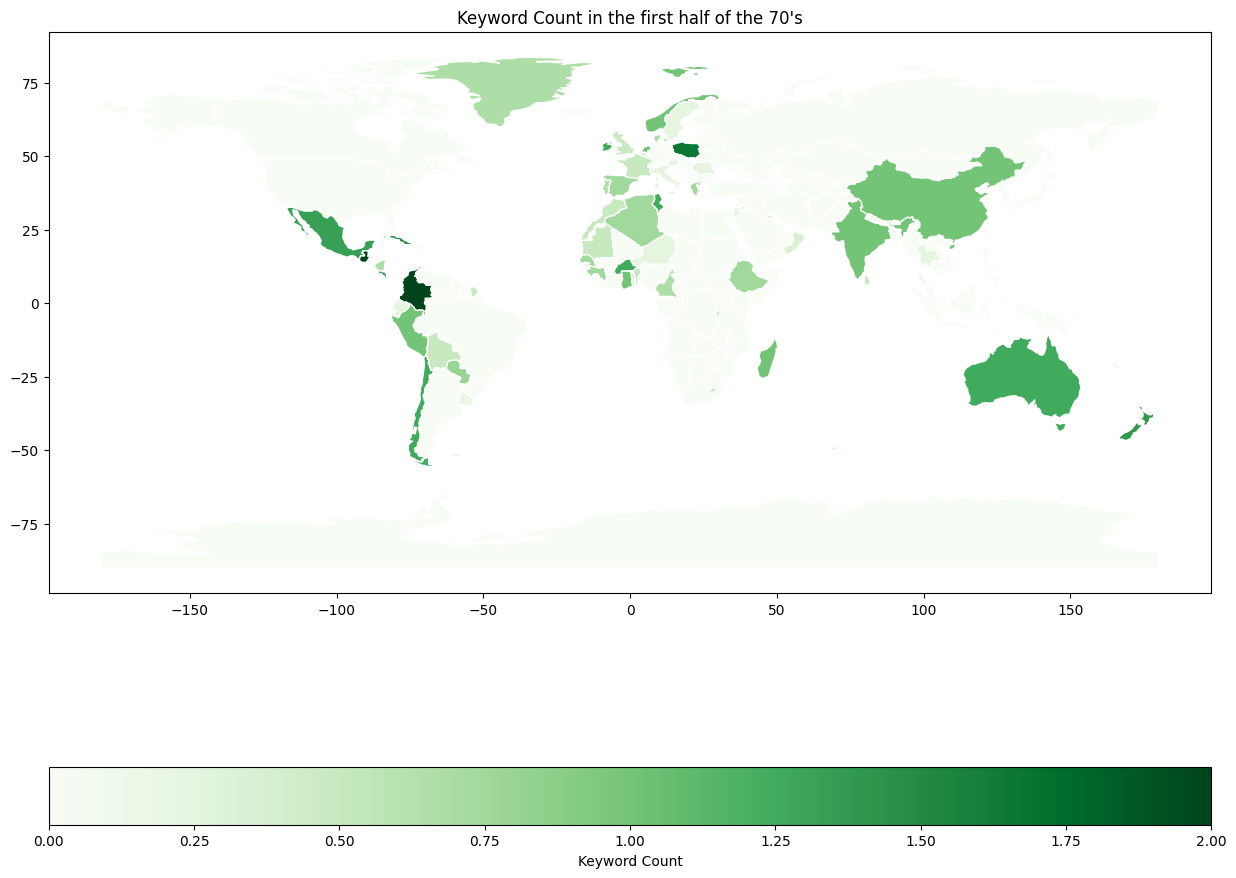

In [66]:
df_70s = world.merge(kw_70, how="left", left_on=['SOVEREIGNT'], right_on=['Country Name'])
df_95s = world.merge(kw_95, how="left", left_on=['SOVEREIGNT'], right_on=['Country Name'])
df_00s = world.merge(kw_00, how="left", left_on=['SOVEREIGNT'], right_on=['Country Name'])
df_17s = world.merge(kw_17, how="left", left_on=['SOVEREIGNT'], right_on=['Country Name'])


df_70s["Keyword Count"] = df_70s["Keyword Count"].fillna(value=0)
df_95s["Keyword Count"] = df_95s["Keyword Count"].fillna(value=0)
df_00s["Keyword Count"] = df_00s["Keyword Count"].fillna(value=0)
df_17s["Keyword Count"] = df_17s["Keyword Count"].fillna(value=0)

df_70s.plot("Keyword Count", 
                           figsize=(15,15),
                           legend=True,
                           edgecolor="white",
                           cmap="Greens",
legend_kwds={"label":"Keyword Count" , 'orientation': 'horizontal'}).set_title("Keyword Count in the first half of the 70's")

Text(0.5, 1.0, "Keyword Count in the first half of the 95's")

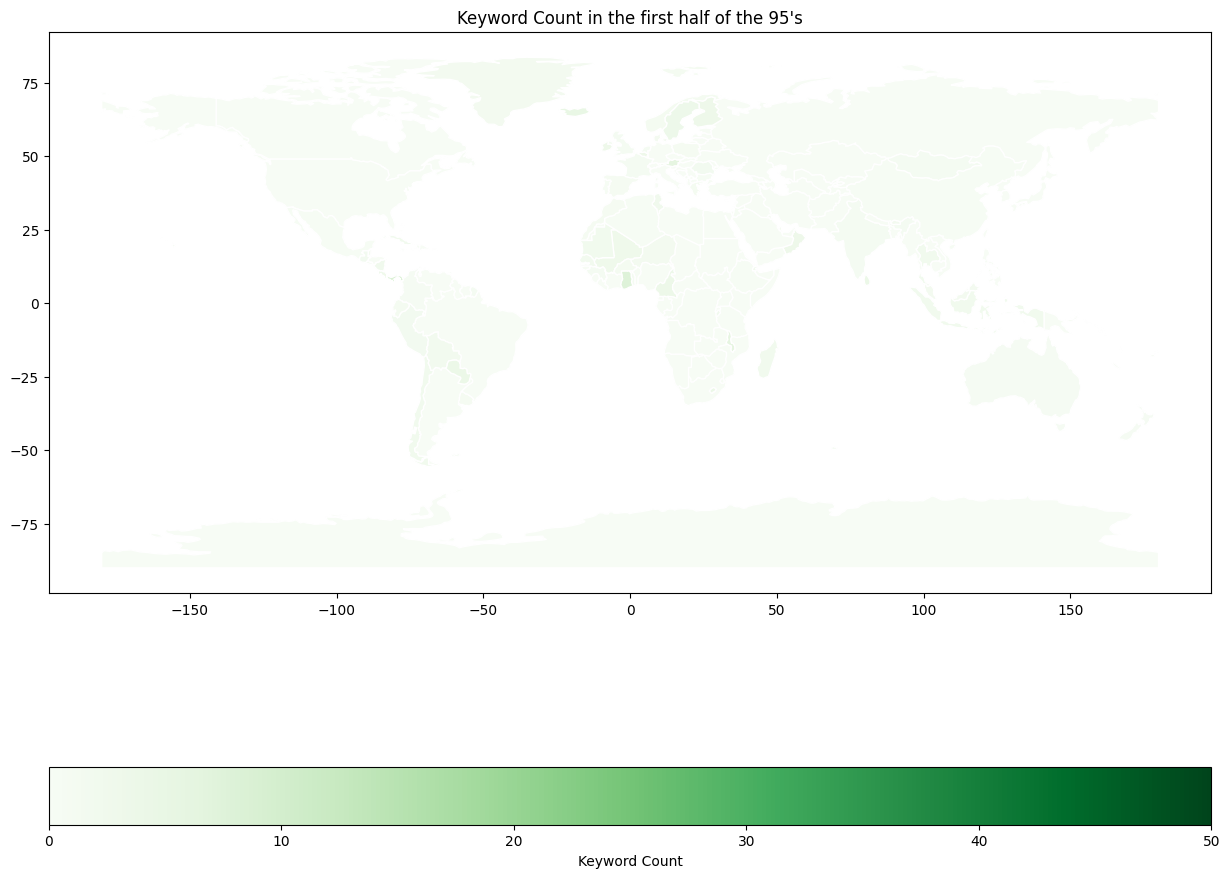

In [67]:
df_95s.plot("Keyword Count", 
                           figsize=(15,15),
                           legend=True,
                           edgecolor="white",
                           cmap="Greens",
                        vmin = 0, vmax=50,
legend_kwds={"label":"Keyword Count" , 'orientation': 'horizontal'}).set_title("Keyword Count in the first half of the 95's")

Text(0.5, 1.0, "Keyword Count in the first half of the 00's")

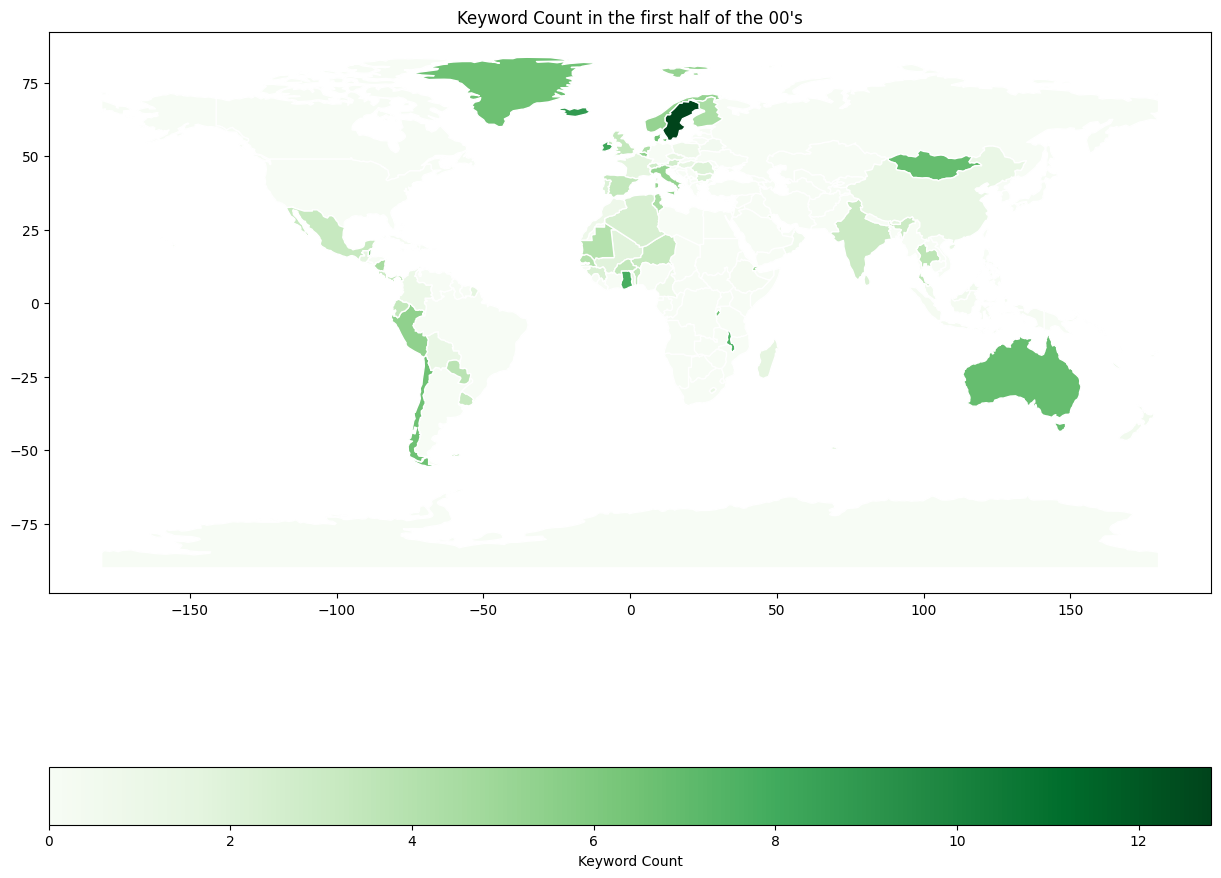

In [68]:
df_00s.plot("Keyword Count", 
                           figsize=(15,15),
                           legend=True,
                           edgecolor="white",
                           cmap="Greens",
legend_kwds={"label":"Keyword Count" , 'orientation': 'horizontal'}).set_title("Keyword Count in the first half of the 00's")

Text(0.5, 1.0, "Keyword Count in the first half of the 17's")

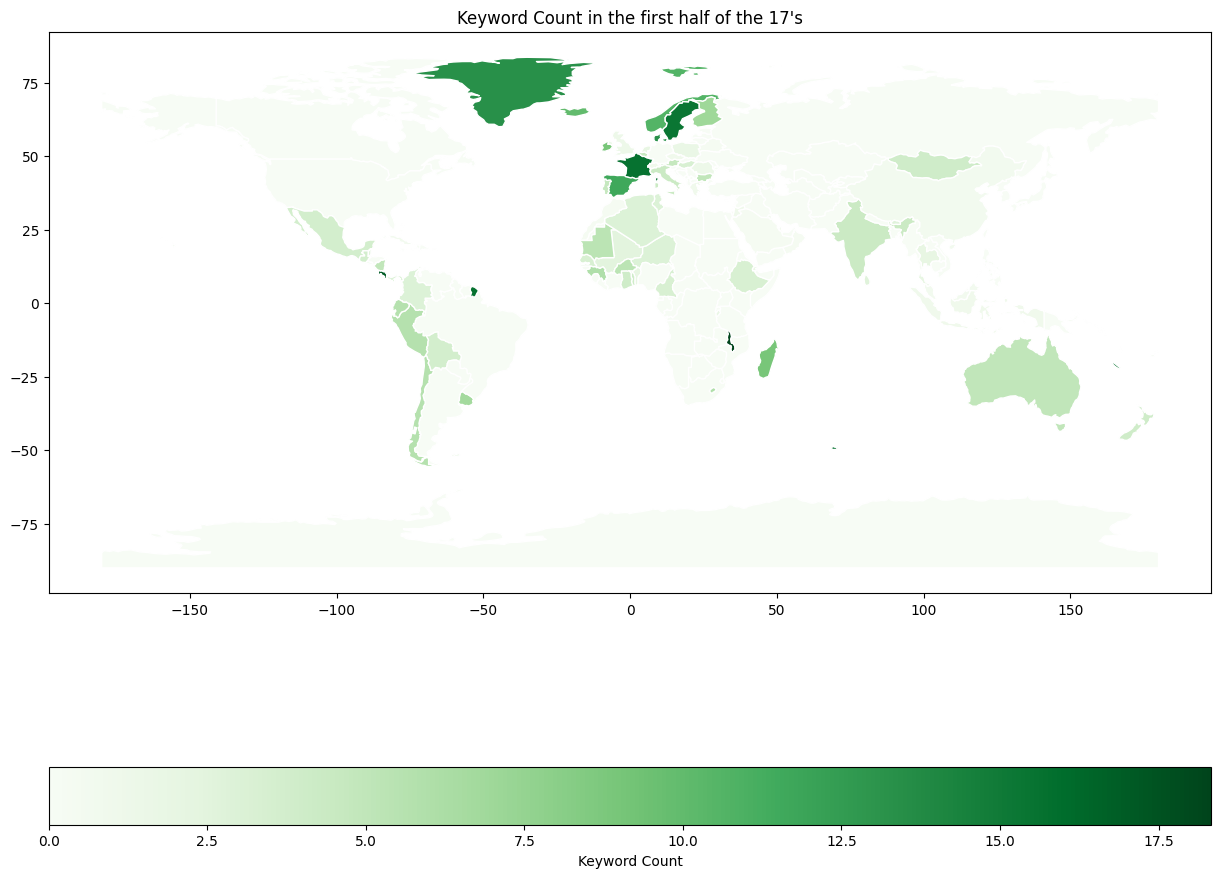

In [69]:

df_17s.plot("Keyword Count", 
                           figsize=(15,15),
                           legend=True,
                           edgecolor="white",
                           cmap="Greens",
legend_kwds={"label":"Keyword Count" , 'orientation': 'horizontal'}).set_title("Keyword Count in the first half of the 17's")

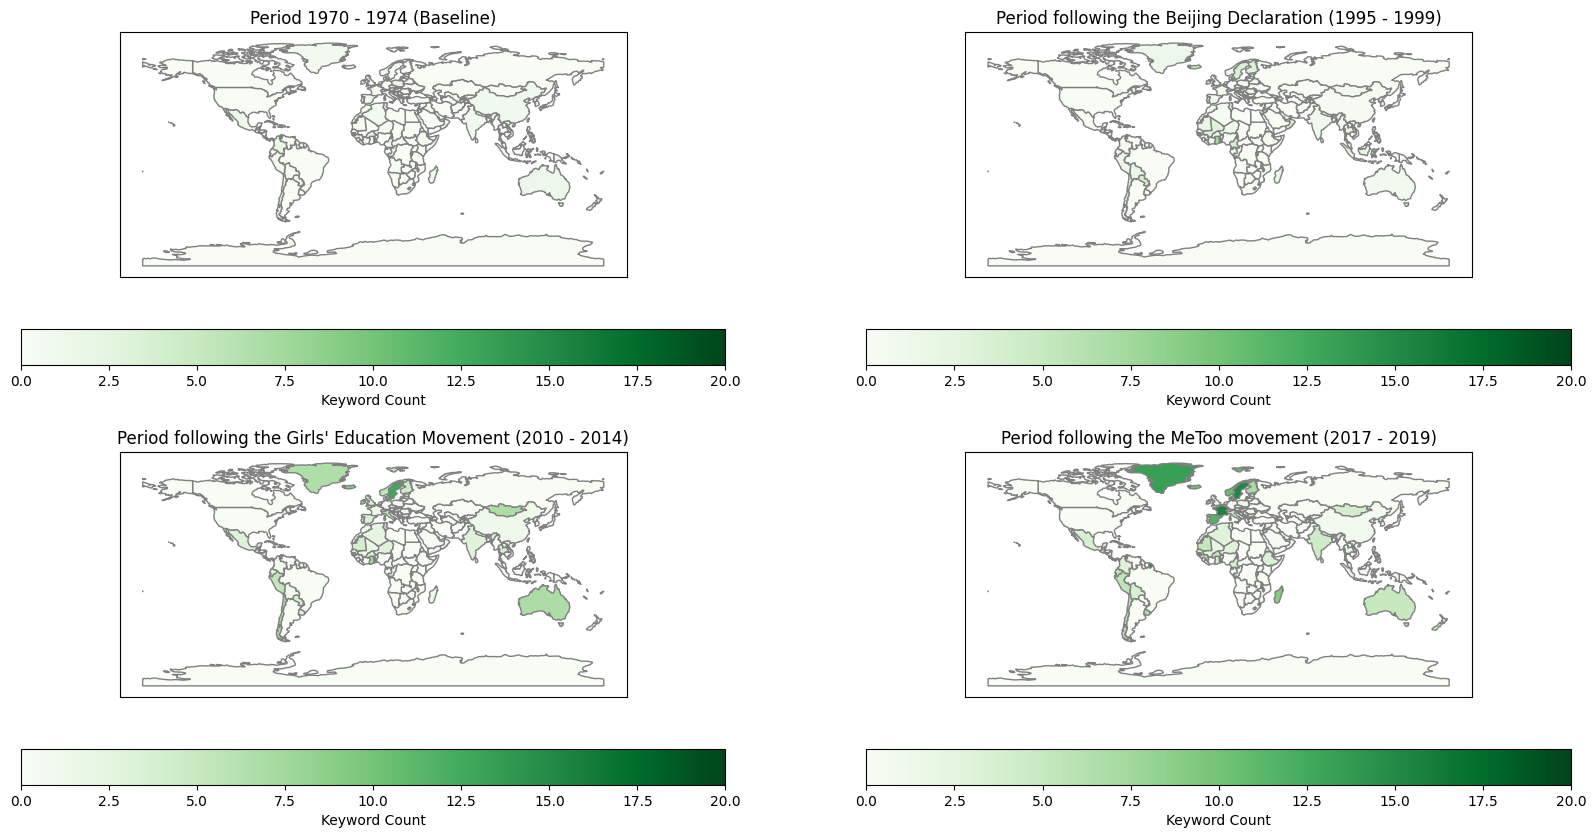

In [83]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
plt.setp(axes, xticks=[], yticks=[])
axes[0,0].set_title('Period 1970 - 1974 (Baseline)')
df_70s.plot("Keyword Count", ax=axes[0,0], edgecolor="grey", vmin = 0, vmax =20,  cmap='Greens', legend=True, legend_kwds={"label":"Keyword Count" , 'orientation': 'horizontal'})
axes[0,1].set_title('Period following the Beijing Declaration (1995 - 1999)')
df_95s.plot("Keyword Count", ax=axes[0,1],edgecolor="grey", vmin = 0, vmax =20, cmap='Greens', legend=True, legend_kwds={"label":"Keyword Count" , 'orientation': 'horizontal'})
axes[1,0].set_title('Period following the Girls\' Education Movement (2010 - 2014)')
df_00s.plot("Keyword Count", ax=axes[1,0],edgecolor="grey", vmin = 0, vmax =20, cmap='Greens', legend=True, legend_kwds={"label":"Keyword Count" , 'orientation': 'horizontal'})
axes[1,1].set_title('Period following the MeToo movement (2017 - 2019)')
df_17s.plot("Keyword Count", ax=axes[1,1],edgecolor="grey", vmin = 0, vmax =20, cmap='Greens', legend=True, legend_kwds={"label":"Keyword Count" , 'orientation': 'horizontal'})
plt.savefig('mean_kw_count.png')

In [73]:
kw_17

,Year,Keyword Count
Country Name,,
Algeria,2018.0,3.000000
Australia,2018.0,5.000000
Austria,2018.0,4.666667
Bahrain,2018.0,2.333333
Belarus,2018.0,0.333333
Belgium,2018.0,4.666667
Belize,2018.0,2.666667
Benin,2018.0,2.000000
Bhutan,2018.0,2.666667
